# Predviđanje prsustva matice u košnici

In [2]:
import numpy as nm
import pandas as pd
from sklearn.model_selection import train_test_split
from math import pow
from sklearn import preprocessing
from numpy import savetxt
import seaborn as sns
import matplotlib.pyplot as plt


## Učitavanje podataka:

In [3]:
datasetStart = pd.read_csv("smart-bee-colony-monitor.csv")
datasetStart.head(5)

,device,hive number,date,hive temp,hive humidity,hive pressure,weather temp,weather humidity,weather pressure,wind speed,...,rain,lat,long,file name,queen presence,queen acceptance,frames,target,time,queen status
0,1,5,2022-06-08 14:52:28,36.42,30.29,1007.45,26.68,52,1013,8.75,...,0,37.29,-121.95,2022-06-08--14-52-28_1.raw,1,2,8,0,0.583,0
1,1,5,2022-06-08 15:51:41,33.56,33.98,1006.93,25.99,53,1012,10.29,...,0,37.29,-121.95,2022-06-08--15-51-41_1.raw,1,2,8,0,0.625,0
2,1,5,2022-06-08 17:21:53,29.01,42.73,1006.68,24.49,56,1012,8.75,...,0,37.29,-121.95,2022-06-08--17-21-53_1.raw,0,0,8,1,0.708,1
3,1,5,2022-06-08 18:20:59,30.51,36.74,1006.68,22.97,59,1012,8.23,...,0,37.29,-121.95,2022-06-08--18-20-59_1.raw,0,0,8,1,0.750,1
4,1,5,2022-06-08 19:20:04,30.32,35.55,1006.58,21.52,61,1012,7.20,...,0,37.29,-121.95,2022-06-08--19-20-04_1.raw,0,0,8,1,0.792,1


In [4]:
shape = datasetStart.shape
print('Velicina dataseta')
print(shape)

Velicina dataseta
(1275, 23)


In [19]:
datasetStart = pd.read_csv("smart-bee-colony-monitor.csv")
izlazni_fajl = "smart-bee1.csv" 
datasetStart = datasetStart.drop(columns=['date','file name']);
datasetStart.to_csv(izlazni_fajl, index=False)
datasetStart.head(5)

,device,hive number,hive temp,hive humidity,hive pressure,weather temp,weather humidity,weather pressure,wind speed,gust speed,...,cloud coverage,rain,lat,long,queen presence,queen acceptance,frames,target,time,queen status
0,1,5,36.42,30.29,1007.45,26.68,52,1013,8.75,NaN,...,75,0,37.29,-121.95,1,2,8,0,0.583,0
1,1,5,33.56,33.98,1006.93,25.99,53,1012,10.29,NaN,...,75,0,37.29,-121.95,1,2,8,0,0.625,0
2,1,5,29.01,42.73,1006.68,24.49,56,1012,8.75,NaN,...,75,0,37.29,-121.95,0,0,8,1,0.708,1
3,1,5,30.51,36.74,1006.68,22.97,59,1012,8.23,10.29,...,75,0,37.29,-121.95,0,0,8,1,0.750,1
4,1,5,30.32,35.55,1006.58,21.52,61,1012,7.20,NaN,...,75,0,37.29,-121.95,0,0,8,1,0.792,1


In [20]:
print(datasetIzmenjen.columns.tolist())

['device', 'hive number', 'hive temp', 'hive humidity', 'hive pressure', 'weather temp', 'weather humidity', 'weather pressure', 'wind speed', 'gust speed', 'weatherID', 'cloud coverage', 'rain', 'lat', 'long', 'queen presence', 'queen acceptance', 'frames', 'target', 'time', 'queen status']


##Graficki prikaz podaaka

<Axes: >

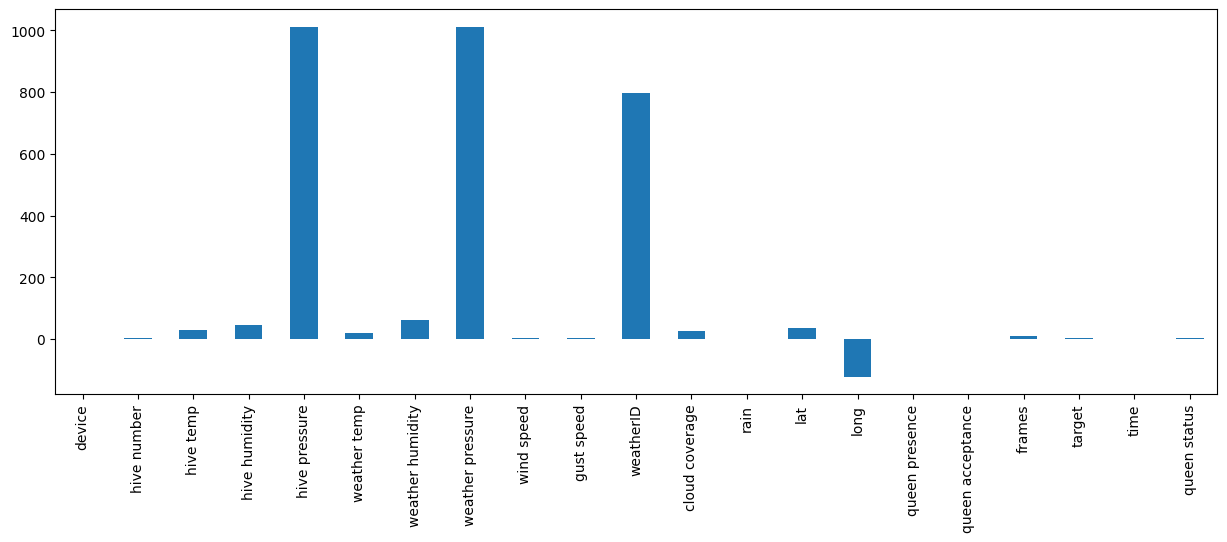

In [22]:
datasetIzmenjen[['device', 'hive number', 'hive temp', 'hive humidity', 'hive pressure', 'weather temp', 'weather humidity', 'weather pressure', 'wind speed', 'gust speed', 'weatherID', 'cloud coverage', 'rain', 'lat', 'long', 'queen presence', 'queen acceptance', 'frames', 'target', 'time', 'queen status']].mean().plot(figsize=(15,5),kind='bar')

# Priprema podataka i deskriptivna analiza 

In [23]:
print('Nedostajuće vrednosti po kolonama:')
print(datasetStart.isnull().sum())
print('Ukupan broj nedostajucih vrednosti: ', datasetStart.isnull().sum().sum())

print('\nTipovi podataka')
print(datasetStart.info())

print('\nSrednja vrednost izražena po kolonama:')
print(datasetStart.mean())

print('\nSrednja vrednost izražena po redovima:')
print(datasetStart.mean(axis=1))
 
print('\nMedijana:')
print(datasetStart.median())

print('\nMode:')
print(datasetStart.mode())

print('\nVarijansa:')
print(datasetStart.var())

print('\nDuplirani podaci:')
print(datasetStart.duplicated().sum())

Nedostajuće vrednosti po kolonama:
device                0
hive number           0
hive temp             0
hive humidity         0
hive pressure         0
weather temp          4
weather humidity      0
weather pressure      0
wind speed            4
gust speed          994
weatherID             0
cloud coverage        0
rain                  0
lat                   4
long                  4
queen presence        0
queen acceptance      0
frames                0
target                0
time                  0
queen status          0
dtype: int64
Ukupan broj nedostajucih vrednosti:  1010

Tipovi podataka
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   device            1275 non-null   int64  
 1   hive number       1275 non-null   int64  
 2   hive temp         1275 non-null   float64
 3   hive humidity     1275 non-null   float64


 Deskriptivna analiza:

In [25]:
print('Deskriptivna analiza dataseta:')
datasetStart.describe()

Deskriptivna analiza dataseta:


,device,hive number,hive temp,hive humidity,hive pressure,weather temp,weather humidity,weather pressure,wind speed,gust speed,...,cloud coverage,rain,lat,long,queen presence,queen acceptance,frames,target,time,queen status
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1271.000000,1275.000000,1275.000000,1271.000000,281.000000,...,1275.000000,1275.0,1.271000e+03,1271.00,1275.000000,1275.000000,1275.00000,1275.000000,1275.000000,1275.000000
mean,1.554510,2.709020,29.009475,44.663890,1009.179169,20.326845,63.501176,1011.370196,3.805452,4.511317,...,27.868235,0.0,3.729000e+01,-121.95,0.876078,1.549020,9.10902,3.396863,0.482972,2.127843
std,0.497215,1.488587,8.172418,18.359731,2.406004,5.587868,16.207222,56.807873,2.311196,3.931787,...,33.641333,0.0,7.108224e-15,0.00,0.329621,0.704151,0.99443,1.586142,0.287396,1.096649
min,1.000000,1.000000,15.500000,7.230000,1003.540000,10.750000,0.000000,0.000000,0.000000,0.450000,...,0.000000,0.0,3.729000e+01,-121.95,0.000000,0.000000,8.00000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,22.455000,32.245000,1007.375000,15.480000,51.000000,1013.000000,2.060000,1.340000,...,0.000000,0.0,3.729000e+01,-121.95,1.000000,1.000000,8.00000,3.000000,0.250000,1.000000
50%,2.000000,3.000000,27.910000,42.180000,1009.170000,19.280000,66.000000,1014.000000,3.600000,2.680000,...,20.000000,0.0,3.729000e+01,-121.95,1.000000,2.000000,10.00000,3.000000,0.500000,3.000000
75%,2.000000,4.000000,33.075000,54.945000,1010.705000,24.850000,78.000000,1016.000000,5.660000,7.600000,...,40.000000,0.0,3.729000e+01,-121.95,1.000000,2.000000,10.00000,5.000000,0.750000,3.000000
max,2.000000,5.000000,55.620000,93.470000,1015.970000,35.430000,88.000000,1021.000000,10.800000,15.430000,...,100.000000,0.0,3.729000e+01,-121.95,1.000000,2.000000,10.00000,5.000000,0.958000,3.000000


Mtrica korelacije:

Text(0.5, 1.0, 'Correlation Heatmap')

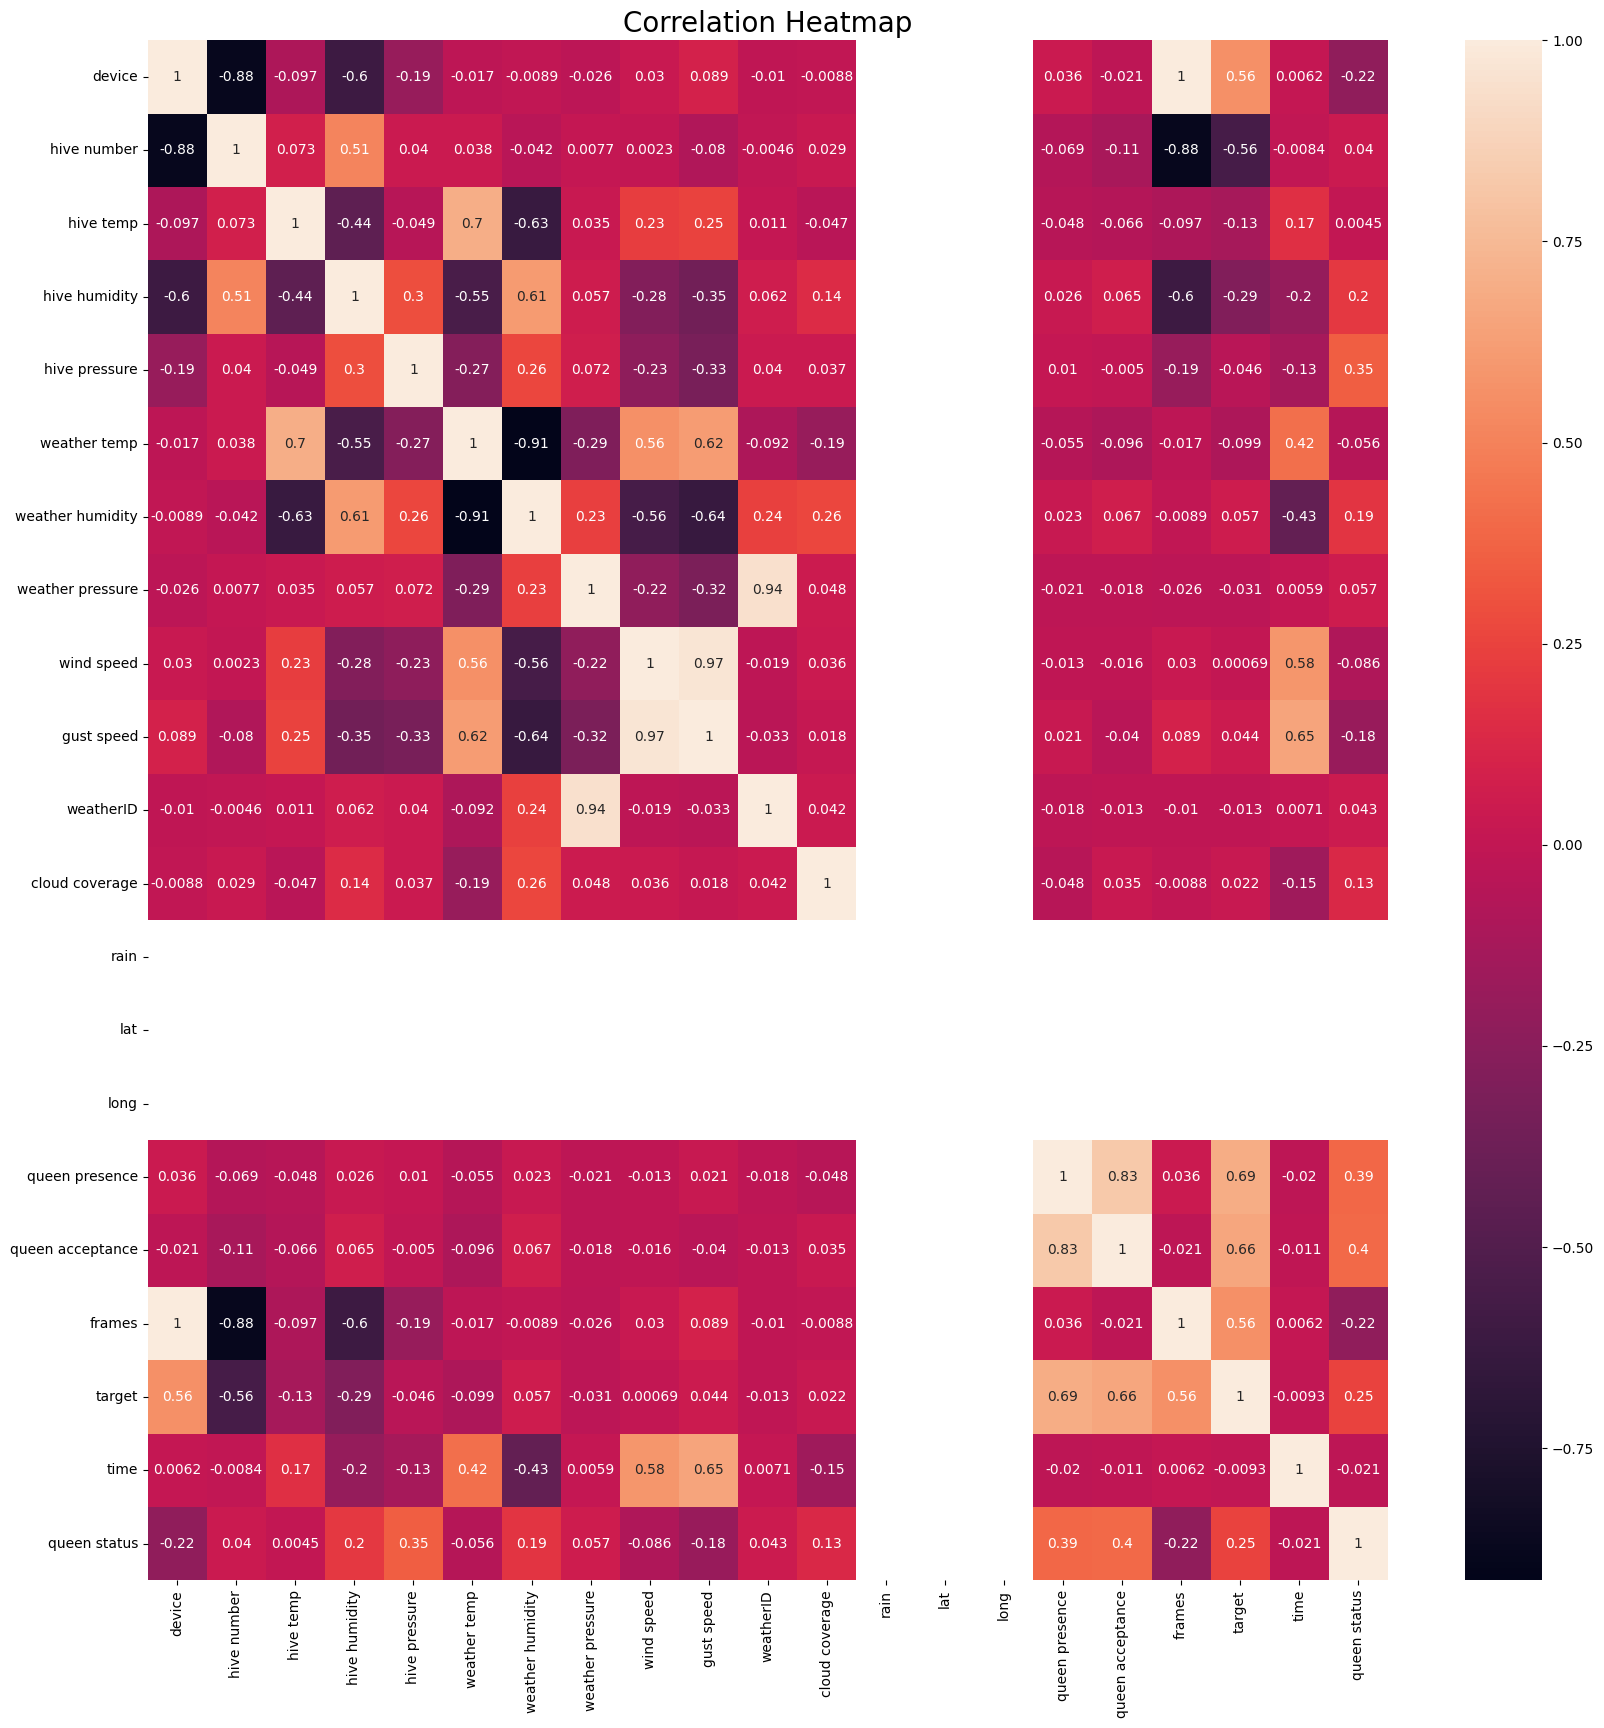

In [26]:
corr_matrix = datasetStart.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap', fontsize=20)

In [27]:
datasetStart.skew()

device              -0.219605
hive number         -0.095629
hive temp            0.844776
hive humidity        0.464294
hive pressure        0.232887
weather temp         0.446464
weather humidity    -0.479675
weather pressure   -17.744574
wind speed           0.445916
gust speed           0.840682
weatherID          -15.190600
cloud coverage       1.039821
rain                 0.000000
lat                  0.000000
long                 0.000000
queen presence      -2.285467
queen acceptance    -1.241644
frames              -0.219605
target              -0.742282
time                -0.017207
queen status        -0.894901
dtype: float64

Skaliranje podataka: